# Homework 6

This homework assignment will give you an opportunity to practice what you have learned about APIs. In tasks 1-3, you will retrieve information from the REST Countries API that we looked at in class. The full documentation is here: [restcountries.com](restcountries.com).

In tasks 4-6, you will use a different API to get currency data.

We will start by importing all the libraries we will need.

In [1]:
# Run this to import all the libraries we will need
import requests as r, matplotlib.pyplot as plt

## Task 1

Use the REST Countries API to get the capital of a country other than that shown below and print it out using Python code. You can modify the code below that currently prints out the capital of Japan.

In [2]:
# Type your code here
country = "Japan"
url = "https://restcountries.com/v3.1/name/"+country+"?fields=capital"
response = r.get(url)
print("Response code:", response.status_code)
country_data = response.json()[0]
print(f"The capital of {country} is {country_data['capital'][0]}.")

Response code: 200
The capital of Japan is Tokyo.


# Task 2

Now write some Python code that allows you to type in a country name and which prints out each of the following:
1. Capital
2. Area
3. Population

You will need to use the input function that we have used before:
```
    country = input("Type the name of a country:")
```
You will also need to modify the URL parameters to get all the information you need. For example, the URL below would get you what you need for France:
```
https://restcountries.com/v3.1/name/france?fields=capital,area,population
```
Also bear in mind that the `'capital'` key returns a list, but the `'area'` and `'population'` keys each return a single string.

In [3]:
# Type your code here

country = input("Type the name of a country: ")
url = "https://restcountries.com/v3.1/name/"+country+"?fields=capital,area,population"
response = r.get(url)
print("Response code:", response.status_code)
country_data = response.json()[0]
print(f"The capital of {country} is {country_data['capital'][0]}.")
print(f"The area of {country} is {country_data['area']} square km.")
print(f"The population of {country} is {country_data['population']}.")

Type the name of a country:  Italy


Response code: 200
The capital of Italy is Rome.
The area of Italy is 301336.0 square km.
The population of Italy is 58927633.


## Task 3

Now write some code that allows you to input the name of a country and then prints out **all** the countries that it borders. The URL you use should look something like this:
```
https://restcountries.com/v3.1/name/france?fields=borders
```
You will need to retrieve the list of bordering countries from the dictionary using something like `country_data['borders']` and then iterate through this list using a `for` loop. 

Three more notes:
1. You can just print the 3-character country codes from the list, you don't need to print the full country names. But you can if you want to figure out how to do this.
2. You get a bonus point if you can deal with the case where a country borders no others by printing "This country doesn't border any others." rather than just a blank line.
3. Some country searches, for example using 'china' in the URL will return multiple countries. You don't have to deal with these cases, but you can if you want.

In [4]:
# Type your code here

country = input("Type the name of a country: ")
url = "https://restcountries.com/v3.1/name/"+country+"?fields=borders"
response = r.get(url)
print("Response code:", response.status_code)
country_data = response.json()[0]
borders_list = country_data["borders"]
if len(borders_list)==0:
    print(f"{country.capitalize()} does not border any other countries.")
else:
    print(f"{country.capitalize()} borders the following countries:")
    for b in borders_list:
        url = "https://restcountries.com/v3.1/alpha/"+b+"?fields=name"
        response = r.get(url)
        if(response.status_code==200):
            common_name = response.json()['name']['common']
            print(common_name)

Type the name of a country:  Germany


Response code: 200
Germany borders the following countries:
Austria
Belgium
Czechia
Denmark
France
Luxembourg
Netherlands
Poland
Switzerland


## Currency API
For tasks 4-6 below we will use the free currency API available here:

https://github.com/fawazahmed0/exchange-api

We will be using two types of URL to get currency data.

Firstly, to get the latest currency data we will use:

https://cdn.jsdelivr.net/npm/@fawazahmed0/currency-api@latest/v1/currencies/usd.json

This will give us how much \\$1.00 US dollar is worth in each currency available. If we wanted the latest currency data based on a different currency, say euros, we would use:

https://cdn.jsdelivr.net/npm/@fawazahmed0/currency-api@latest/v1/currencies/eur.json

Secondly, to get historical data for previous dates, we will use:

https://cdn.jsdelivr.net/npm/@fawazahmed0/currency-api@2026-02-26/v1/currencies/usd.json

Notice that this is the same URL as above, but with the word `latest` replaced with a date in the format `YYYY-MM-DD`.

## Task 4

Use the first URL to get the latest currency data based on the value of \\$1.00 USD. Then use the dictionary to print out the value of \\$1.00 USD in each of the following currencies:

1. British Pounds (gbp)
2. Euros (eur)
3. Japanese Yen (jpy)

For example, if your reponse is stored in a JSON object called `currency_data`, you would use the following to get the value of $1.00 in GBP: `currency_data['usd']['gbp']`.

A full list of ISO standard currency codes is available here:

https://developer.cybersource.com/docs/cybs/en-us/boarding/user/all/ebc/boarding-user/boarding-currency-codes.html


In [5]:
# Type your code here

url = "https://cdn.jsdelivr.net/npm/@fawazahmed0/currency-api@latest/v1/currencies/usd.json"
response = r.get(url)
currency_data = response.json()
gbp = currency_data['usd']['gbp']
print(f"$1.00 = {gbp:.4f} GBP")

$1.00 = 0.7415 GBP


## Task 5

Now use the example above to help you make a currency converter. For this converter, you will get the user to input two things:
1. An amount in USD.
2. An currency code that you want to convert to (typically a 3-letter code like gbp, eur, jpy).

The code should then print how much your amount in dollars is worth in the chosen currency. For example if you typed in \\$3000 and gbp, it would print "\\$3000 is worth 2224.64 GBP" (or whatever latest rate is).

Make sure you make a fresh API request so you are always getting the latest available currency rates.

**Note**: The API is expecting the currency code in lower case. You can easily switch between upper and lower case in Python with the following:
- `str1.capitalize()` will capitalize the first letter of a string called `str1`.
- `str1.upper()` will capitalize all the letters of `str1`.
- `str1.lower()` will make all the letters of `str1` lowercase.

In [6]:
# Type your code here

amount = float(input("Enter an amount in USD:"))
currency_code = input("Enter the currency code for the currency you want to convert USD into:").lower()

url = "https://cdn.jsdelivr.net/npm/@fawazahmed0/currency-api@latest/v1/currencies/usd.json"
response = r.get(url)
currency_data = response.json()
conversion = currency_data['usd'][currency_code]
print(f"${amount:.2f} is worth {amount*conversion:.2f} {currency_code.upper()}.")

Enter an amount in USD: 35000
Enter the currency code for the currency you want to convert USD into: aud


$35000.00 is worth 49192.05 AUD.


## Task 6 (Optional Bonus)

In this task, you will retrieve historic currency prices from the same free currency API we have used above. You will then use the data you obtain to plot a graph.

The code below gets the price of $1.00 USD in GBP for each day between Feb 01 and Feb 26, 2026. It then prints out the value of \\$1.00 in GBP for each day in this time window.

Run the code to see what it does. Then modify the code so that you create a list of currency prices for each day of the month of February for a currency of your choosing. Use the lists you create to plot a graph of the value of $1.00 in your chosen currency for this time period. Title and label your graph appropriately.

In [7]:
# Get currency prices for GBP versus USD for Feb 01 through Feb 26, 2026.
# Start and end days of February for which we are getting data
first_day = 1
last_day = 26

# Make a separate API request for each day to get currency prices
for day in range(first_day, last_day+1):
    url = url = "https://cdn.jsdelivr.net/npm/@fawazahmed0/currency-api@2026-02-"+f"{day:02d}"+"/v1/currencies/usd.json"
    response = r.get(url)
    if response.status_code!=200:
        print("Request Error.")
    else:
        data = response.json()
        print(f"Date: {data['date']}")
        print(f"$1.00 = {data['usd']['gbp']:.5f} GBP.")

Date: 2026-02-01
$1.00 = 0.73045 GBP.
Date: 2026-02-02
$1.00 = 0.73010 GBP.
Date: 2026-02-03
$1.00 = 0.73117 GBP.
Date: 2026-02-04
$1.00 = 0.72969 GBP.
Date: 2026-02-05
$1.00 = 0.73320 GBP.
Date: 2026-02-06
$1.00 = 0.73808 GBP.
Date: 2026-02-07
$1.00 = 0.73458 GBP.
Date: 2026-02-08
$1.00 = 0.73458 GBP.
Date: 2026-02-09
$1.00 = 0.73485 GBP.
Date: 2026-02-10
$1.00 = 0.73034 GBP.
Date: 2026-02-11
$1.00 = 0.73221 GBP.
Date: 2026-02-12
$1.00 = 0.73330 GBP.
Date: 2026-02-13
$1.00 = 0.73410 GBP.
Date: 2026-02-14
$1.00 = 0.73232 GBP.
Date: 2026-02-15
$1.00 = 0.73255 GBP.
Date: 2026-02-16
$1.00 = 0.73301 GBP.
Date: 2026-02-17
$1.00 = 0.73448 GBP.
Date: 2026-02-18
$1.00 = 0.73762 GBP.
Date: 2026-02-19
$1.00 = 0.74093 GBP.
Date: 2026-02-20
$1.00 = 0.74415 GBP.
Date: 2026-02-21
$1.00 = 0.74184 GBP.
Date: 2026-02-22
$1.00 = 0.74149 GBP.
Date: 2026-02-23
$1.00 = 0.73930 GBP.
Date: 2026-02-24
$1.00 = 0.74087 GBP.
Date: 2026-02-25
$1.00 = 0.74008 GBP.
Date: 2026-02-26
$1.00 = 0.73736 GBP.


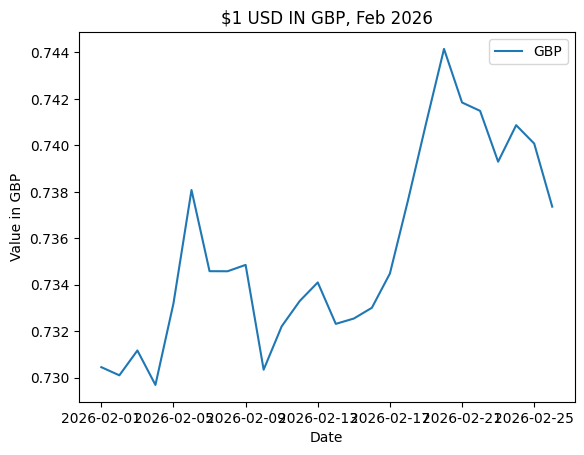

In [8]:
# Type your code here
first_day = 1
last_day = 26
import datetime as d, matplotlib.pyplot as plt
dates = []
gbp = []
eur = []
for day in range(first_day, last_day+1):
    url = url = "https://cdn.jsdelivr.net/npm/@fawazahmed0/currency-api@2026-02-"+f"{day:02d}"+"/v1/currencies/usd.json"
    response = r.get(url)
    if response.status_code!=200:
        print("Request Error.")
    else:
        data = response.json()
        dates.append(d.datetime(2026, 2, day))
        gbp.append(data['usd']['gbp'])

# Plot graph
xticks = []
for day in range(first_day, last_day+1, 7):
    xticks.append(d.datetime(2026, 2, day))
plt.plot(dates, gbp, label='GBP')
plt.title("$1.00 USD IN GBP, Feb 2026")
plt.xticks(xticks)
plt.xlabel("Date")
plt.ylabel("Value in GBP")
plt.show()
